## Visualization With Seaborn

- Seaborn is a Python data visualization library based on matplotlib.
- It provides a high-level interface for drawing attractive and informative statistical graphics. It provide choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames.
- The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

### Table of Contents

1. Creating basic plots
    - Line Chart
    - Bar Chart
    - Histogram
    - Box plot
    - Violin plot
    - Scatter plot
    - Hue semantic
    - Bubble plot
    - Pie Chart
2. Advance Categorical plots in Seaborn
3. Density plots
4. Pair plots

In [10]:
# importing required libraries
import seaborn as sns
sns.set()
sns.set(style="darkgrid")


import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,10)

***In this notebook we will use the Big Mart Sales Data. You can download the data from : https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/download/train-file*** 

### Loading dataset

In [11]:
# read the dataset
data_BM = pd.read_csv('bigmart_data.csv')
# drop the null values
data_BM = data_BM.dropna(how="any")
# multiply Item_Visibility by 100 to increase size
data_BM["Visibility_Scaled"] = data_BM["Item_Visibility"] * 100
# view the top results
data_BM.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Visibility_Scaled
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1.604730
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.927822
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.676007
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.000000
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0.000000


## 1. Creating basic plots

Let's have a look on how can you create some basic plots in seaborn in a single line for which multiple lines were required in matplotlib.

#### Line Chart

 * With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable.
 * In seaborn, this can be accomplished by the **lineplot()** function, either directly or with **relplot()** by setting **kind="line":**

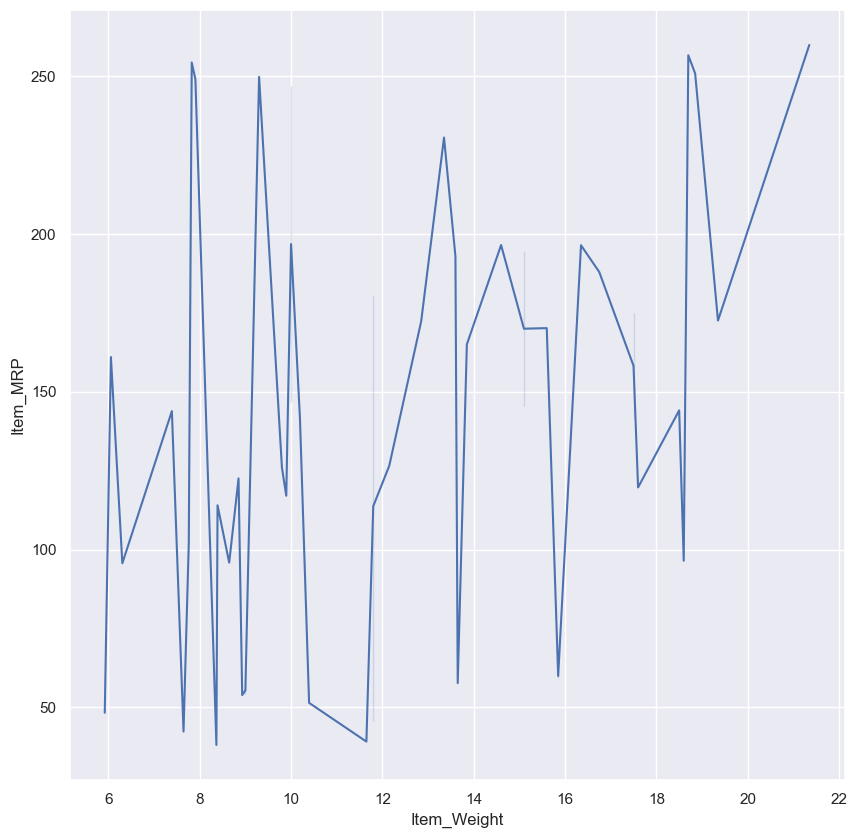

In [12]:
# line plot using relplot
import seaborn as sns
sns.lineplot(x="Item_Weight", y="Item_MRP",data=data_BM[:50]);

#### Bar Chart

- In seaborn, you can create a barchart by simply using the **barplot** function.
- Notice that to achieve the same thing in matplotlib, we had to write extra code just to group the data category wise.
- And then we had to write much more code to make sure that the plot comes out correct.

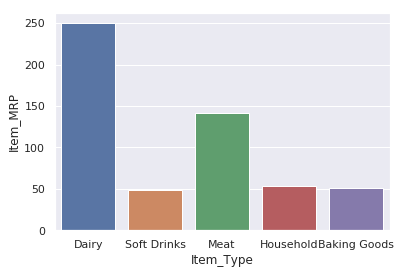

In [7]:
sns.barplot(x="Item_Type", y="Item_MRP", data=data_BM[:5])

#### Histogram

- You can create a histogram in seaborn by simply using the **distplot()**. There are multiple options that we can use which we will see further in the notebook.

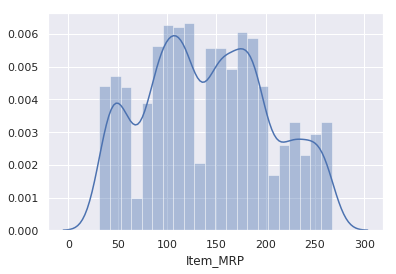

In [8]:
sns.distplot(data_BM['Item_MRP'])

#### Box plots

- You can use the **boxplot()** for creating boxplots in seaborn.
- Let's try to visualize the distribution of Item_Outlet_Sales of items.

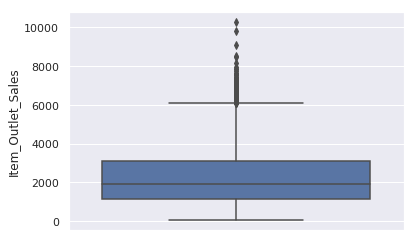

In [9]:
sns.boxplot(data_BM['Item_Outlet_Sales'], orient='vertical')

#### Violin plot

- A violin plot plays a similar role as a box and whisker plot. 
- It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. 
- Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.
- You can create a violinplot using the **violinplot()** in seaborn.

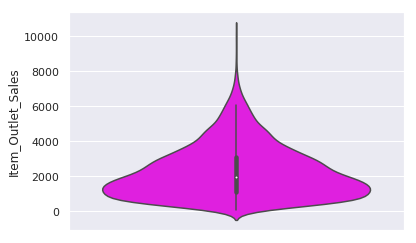

In [10]:
sns.violinplot(data_BM['Item_Outlet_Sales'], orient='vertical', color='magenta')

#### Scatter plot

* It depicts the distribution of two variables using a cloud of points, where each point represents an observation in the dataset. 
* This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.
- You can use **relplot()** with the option of `kind=scatter` to plot a scatter plot in seaborn.

***NOTE : Here, we are going to use only a subset of the data for the plots.***

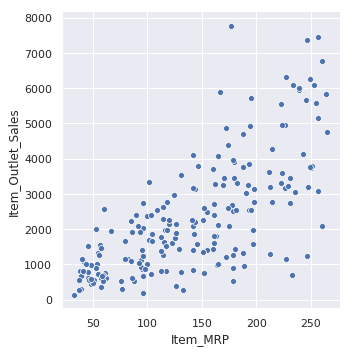

In [11]:
# scatter plot
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", data=data_BM[:200], kind="scatter");

### b. Categorical distribution plots

#### Box Plots

 * Box plot shows the three quartile values of the distribution along with extreme values. 
 * The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. 
 * This means that each value in the boxplot corresponds to an actual observation in the data.

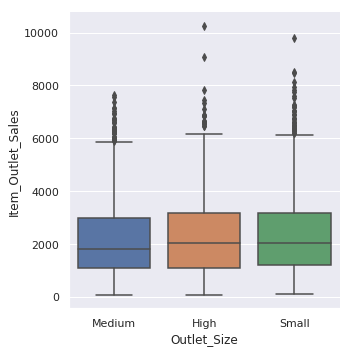

In [18]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="box",data=data_BM);

#### Violin Plots

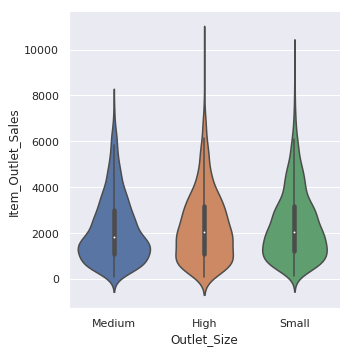

In [19]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="violin",data=data_BM);


#### Bar plots

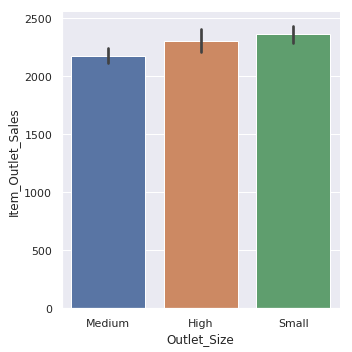

In [22]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="bar",data=data_BM);

### Histogram and Density Plot

***Histograms and KDE can be combined using distplot:***

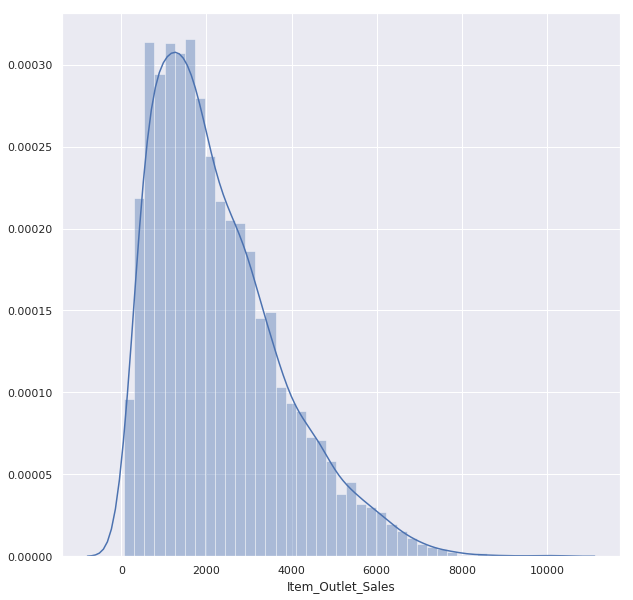

In [25]:
plt.figure(figsize=(10,10))
sns.distplot(data_BM['Item_Outlet_Sales']);

In [5]:
print(data_BM.corr())

                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.010229  0.033330   
Item_Visibility              -0.010229         1.000000 -0.007292   
Item_MRP                      0.033330        -0.007292  1.000000   
Outlet_Establishment_Year    -0.010596         0.009324  0.004105   
Item_Outlet_Sales             0.010972        -0.009644  0.679594   
Visibility_Scaled            -0.010229         1.000000 -0.007292   

                           Outlet_Establishment_Year  Item_Outlet_Sales  \
Item_Weight                                -0.010596           0.010972   
Item_Visibility                             0.009324          -0.009644   
Item_MRP                                    0.004105           0.679594   
Outlet_Establishment_Year                   1.000000          -0.040869   
Item_Outlet_Sales                          -0.040869           1.000000   
Visibility_Scaled                           0.009324          -0.0

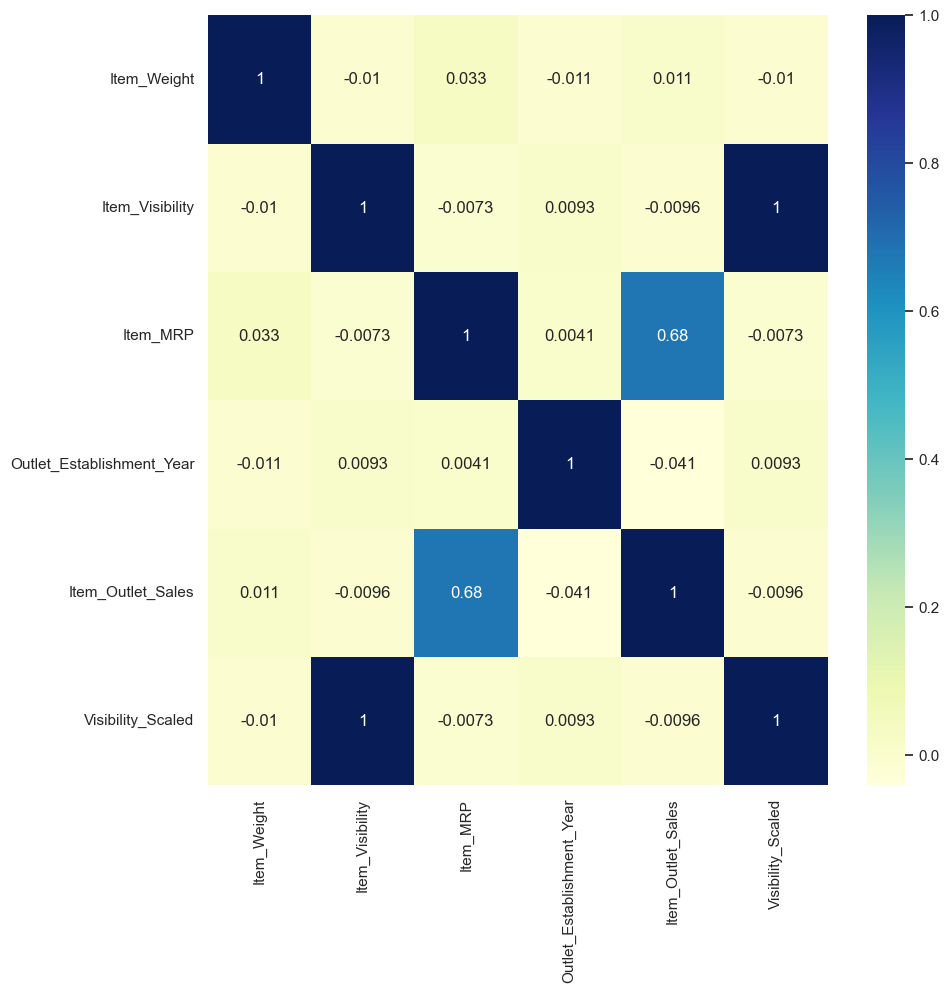

In [9]:
dataplot = sns.heatmap(data_BM.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 